# Importing necessry libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [101]:
# Load the dataset
df = pd.read_csv('Health_stats.csv')

# Obtaining the statistics of each column of the dataset. 

In [102]:
# Display the first few rows of the dataset
df.head(10)

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007.0,...,7.58,Medication,21064.0,No,91.82,4493.0,2.16,16886.0,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318.0,...,5.11,Surgery,47851.0,Yes,76.65,2366.0,4.82,80639.0,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878.0,...,3.49,Vaccination,27834.0,Yes,98.55,41.0,5.81,12245.0,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224.0,...,8.44,Surgery,144.0,Yes,67.35,3201.0,2.22,49336.0,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908.0,...,5.90,Medication,8908.0,Yes,50.06,2832.0,6.93,47701.0,0.50,48.14
5,Saudi Arabia,2011,Dengue,Bacterial,10.99,6.49,4.64,61+,Female,479234.0,...,0.62,Therapy,42671.0,Yes,93.17,416.0,9.83,29597.0,0.46,56.50
6,USA,2013,Malaria,Cardiovascular,18.42,6.33,9.33,61+,Female,289931.0,...,3.31,Surgery,15579.0,No,92.80,4535.0,0.89,60027.0,0.70,20.48
7,Nigeria,2007,Tuberculosis,Neurological,3.48,5.71,1.21,0-18,Female,393296.0,...,3.54,Medication,15744.0,Yes,65.45,4584.0,9.81,23222.0,0.46,66.49
8,Italy,2000,Rabies,Chronic,15.59,4.74,6.38,19-35,Female,253110.0,...,5.84,Therapy,7669.0,Yes,NaN,2253.0,9.92,30849.0,0.55,41.27
9,Australia,2006,Cholera,Chronic,10.12,2.08,6.00,61+,Male,174143.0,...,6.01,Medication,9468.0,Yes,93.21,4694.0,2.96,68856.0,0.90,83.30


In [103]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (100000, 22)


In [104]:
# Display dataset information (structure and types of attributes)
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Country                             100000 non-null  object 
 1   Year                                100000 non-null  int64  
 2   Disease Name                        100000 non-null  object 
 3   Disease Category                    100000 non-null  object 
 4   Prevalence Rate (%)                 99941 non-null   float64
 5   Incidence Rate (%)                  99951 non-null   float64
 6   Mortality Rate (%)                  99952 non-null   float64
 7   Age Group                           100000 non-null  object 
 8   Gender                              100000 non-null  object 
 9   Population Affected                 99957 non-null   float64
 10  Healthcare Access (%)               99961 non-null   float64
 11  Doctors per 

In [105]:
exclude_columns = ['Year'] # Columns to exclude
filtered_df = df.drop(columns=exclude_columns, errors='ignore')

In [106]:
# Basic statistics for numerical columns

print("\nSummary Statistics (Numerical Data):")
print(filtered_df.describe())


Summary Statistics (Numerical Data):
       Prevalence Rate (%)  Incidence Rate (%)  Mortality Rate (%)  \
count         99941.000000        99951.000000        99952.000000   
mean             10.054468            7.569498            5.054954   
std               5.740560            4.293954            2.862391   
min               0.100000            0.100000            0.100000   
25%               5.100000            3.860000            2.580000   
50%              10.040000            7.580000            5.050000   
75%              15.030000           11.290000            7.530000   
max              20.000000           15.000000           10.000000   

       Population Affected  Healthcare Access (%)  Doctors per 1000  \
count         99957.000000           99961.000000      99962.000000   
mean         500228.184339              74.959228          2.744740   
std          288437.262678              14.434187          1.298988   
min            1000.000000              50.0000

In [107]:
# Median for each numerical column

print("\nMedian of Each Column:")
print(filtered_df.median(numeric_only=True))


Median of Each Column:
Prevalence Rate (%)                 10.04
Incidence Rate (%)                   7.58
Mortality Rate (%)                   5.05
Population Affected             499944.00
Healthcare Access (%)               75.00
Doctors per 1000                     2.74
Hospital Beds per 1000               5.25
Average Treatment Cost (USD)     24950.00
Recovery Rate (%)                   74.61
DALYs                             2518.00
Improvement in 5 Years (%)           5.01
Per Capita Income (USD)          50449.00
Education Index                      0.65
Urbanization Rate (%)               54.99
dtype: float64


In [108]:
# Mean for each numerical column 
print("\nMean of Each Column:")
print(filtered_df.mean(numeric_only=True).round(2))


Mean of Each Column:
Prevalence Rate (%)                 10.05
Incidence Rate (%)                   7.57
Mortality Rate (%)                   5.05
Population Affected             500228.18
Healthcare Access (%)               74.96
Doctors per 1000                     2.74
Hospital Beds per 1000               5.24
Average Treatment Cost (USD)     24993.89
Recovery Rate (%)                   74.56
DALYs                             2504.91
Improvement in 5 Years (%)           5.01
Per Capita Income (USD)          50408.85
Education Index                      0.65
Urbanization Rate (%)               55.02
dtype: float64


In [109]:
# Variance
print("\nVariance of Each Numerical Column:")
print(filtered_df.var(numeric_only=True).round(2))


Variance of Each Numerical Column:
Prevalence Rate (%)             3.295000e+01
Incidence Rate (%)              1.844000e+01
Mortality Rate (%)              8.190000e+00
Population Affected             8.319605e+10
Healthcare Access (%)           2.083500e+02
Doctors per 1000                1.690000e+00
Hospital Beds per 1000          7.500000e+00
Average Treatment Cost (USD)    2.069083e+08
Recovery Rate (%)               2.007700e+02
DALYs                           2.087040e+06
Improvement in 5 Years (%)      8.290000e+00
Per Capita Income (USD)         8.207124e+08
Education Index                 2.000000e-02
Urbanization Rate (%)           4.087100e+02
dtype: float64


In [110]:
# Standard deviation 
print("\nStandard Deviation:")
print(filtered_df.std(numeric_only=True).round(2))


Standard Deviation:
Prevalence Rate (%)                  5.74
Incidence Rate (%)                   4.29
Mortality Rate (%)                   2.86
Population Affected             288437.26
Healthcare Access (%)               14.43
Doctors per 1000                     1.30
Hospital Beds per 1000               2.74
Average Treatment Cost (USD)     14384.31
Recovery Rate (%)                   14.17
DALYs                             1444.66
Improvement in 5 Years (%)           2.88
Per Capita Income (USD)          28648.08
Education Index                      0.14
Urbanization Rate (%)               20.22
dtype: float64


In [111]:
# Min and Max for each column 
print("\nMinimum and Maximum Values of Each Numerical Column:")
print("Minimum:\n", filtered_df.min(numeric_only=True))
print("\nMaximum:\n", filtered_df.max(numeric_only=True))


Minimum and Maximum Values of Each Numerical Column:
Minimum:
 Prevalence Rate (%)                0.1
Incidence Rate (%)                 0.1
Mortality Rate (%)                 0.1
Population Affected             1000.0
Healthcare Access (%)             50.0
Doctors per 1000                   0.5
Hospital Beds per 1000             0.5
Average Treatment Cost (USD)     100.0
Recovery Rate (%)                 50.0
DALYs                              1.0
Improvement in 5 Years (%)         0.0
Per Capita Income (USD)          502.0
Education Index                    0.4
Urbanization Rate (%)             20.0
dtype: float64

Maximum:
 Prevalence Rate (%)                 20.0
Incidence Rate (%)                  15.0
Mortality Rate (%)                  10.0
Population Affected             999991.0
Healthcare Access (%)              100.0
Doctors per 1000                     5.0
Hospital Beds per 1000              10.0
Average Treatment Cost (USD)     50000.0
Recovery Rate (%)                   

# Handling missing values

In [112]:
# Display missing values
missing_values = df.isnull().sum()
missing_values_percentage = (df.isnull().mean() * 100).round(2)

# Combine count and percentage
missing_summary = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing Percentage (%)": missing_values_percentage
})

print(missing_summary)

                                    Missing Count  Missing Percentage (%)
Country                                         0                    0.00
Year                                            0                    0.00
Disease Name                                    0                    0.00
Disease Category                                0                    0.00
Prevalence Rate (%)                            59                    0.06
Incidence Rate (%)                             49                    0.05
Mortality Rate (%)                             48                    0.05
Age Group                                       0                    0.00
Gender                                          0                    0.00
Population Affected                            43                    0.04
Healthcare Access (%)                          39                    0.04
Doctors per 1000                               38                    0.04
Hospital Beds per 1000                

In [113]:
# Replace missing values with column mean where applicable
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Check if there are missing values
        if df[column].dtype == 'float64' or df[column].dtype == 'int64': 
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)

# Check if missing values have been replaced
missing_values_after = df.isnull().sum()
missing_values_after_percentage = (df.isnull().mean() * 100).round(2)

mode_value = df['Disease Category'].mode()[0]
df['Disease Category'].fillna(mode_value, inplace=True)

# Combine count and percentage of missing values after filling
missing_summary_after = pd.DataFrame({
    "Missing Count After": missing_values_after})

print(missing_summary_after)

                                    Missing Count After
Country                                               0
Year                                                  0
Disease Name                                          0
Disease Category                                      0
Prevalence Rate (%)                                   0
Incidence Rate (%)                                    0
Mortality Rate (%)                                    0
Age Group                                             0
Gender                                                0
Population Affected                                   0
Healthcare Access (%)                                 0
Doctors per 1000                                      0
Hospital Beds per 1000                                0
Treatment Type                                        0
Average Treatment Cost (USD)                          0
Availability of Vaccines/Treatment                    0
Recovery Rate (%)                               

# Handling Outliers

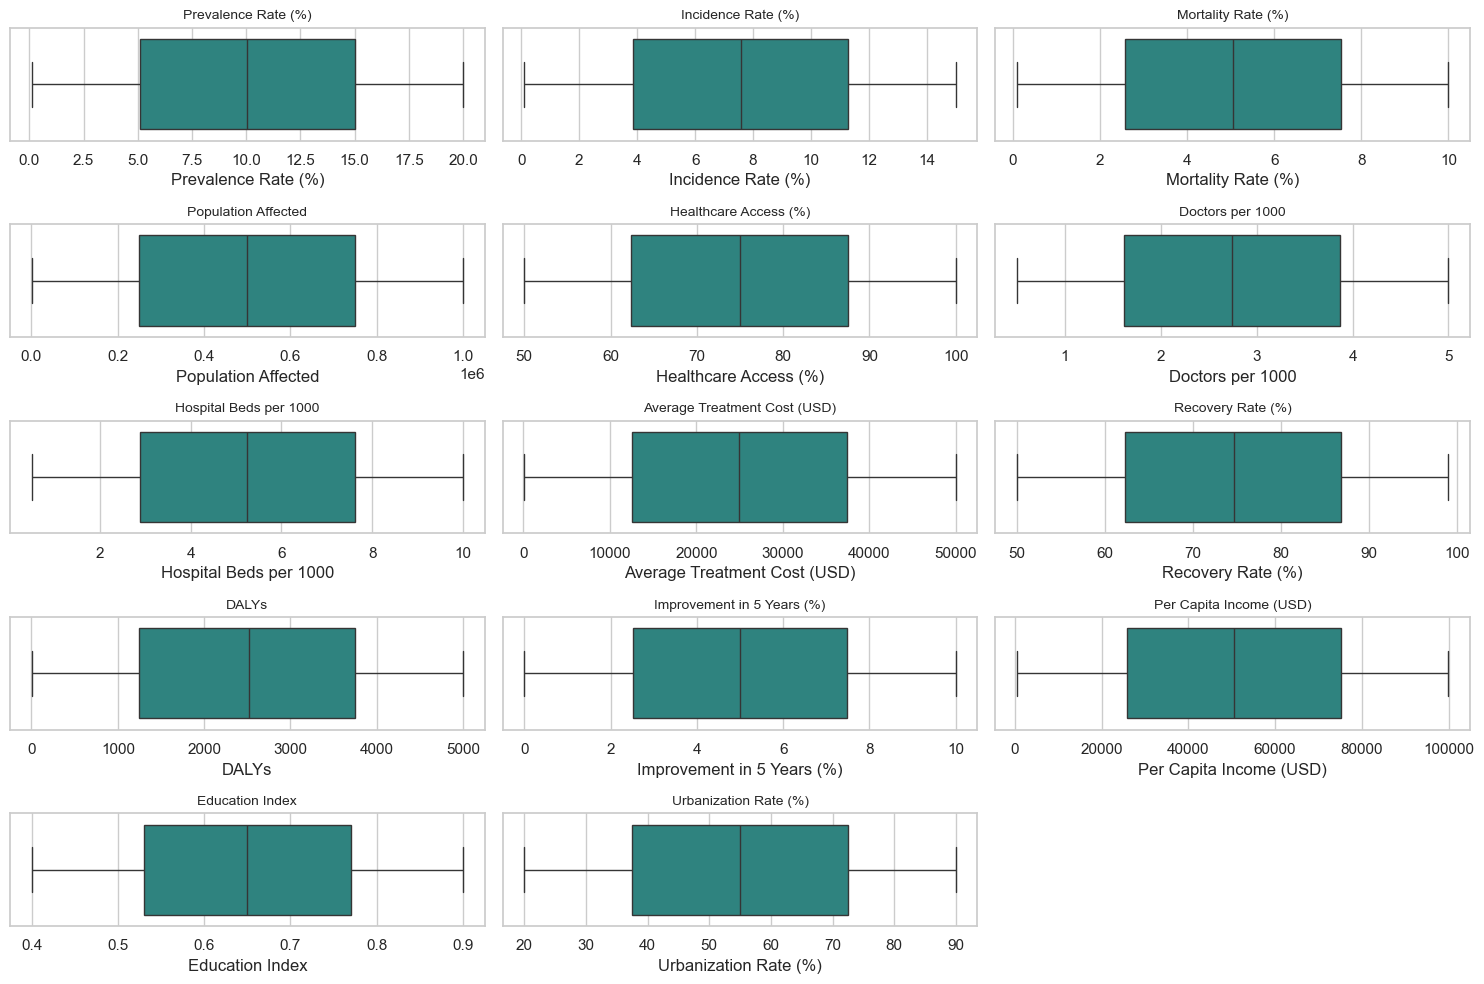

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")

# Assume df is already defined
numerical_cols = df.select_dtypes(include=np.number).columns
cols_to_exclude = ['Year', 'Age Group']
cols_to_analyze = [col for col in numerical_cols if col not in cols_to_exclude]

# Calculate the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the grid
num_rows = int(np.ceil(len(cols_to_analyze) / num_cols))  # Calculate rows needed

plt.figure(figsize=(15, 10))  # Adjust figure size

for i, col in enumerate(cols_to_analyze):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.boxplot(x=df[col], orient='h', palette="viridis")  
    plt.title(f'{col}', fontsize=10)
    plt.xlabel(col)
    plt.tight_layout()  

plt.show()


In [115]:
# Select 'Average Treatment Cost (USD)' and handle potential missing values
avg_treatment_cost = df['Average Treatment Cost (USD)'].dropna()

# Discretize using equal-frequency binning with 5 bins
num_bins = 5
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'] 
df['AvgTreatCost_Binned'] = pd.qcut(avg_treatment_cost, num_bins, labels=labels, duplicates='drop')

# Display the first few rows to see the new column
print(df[['Average Treatment Cost (USD)', 'AvgTreatCost_Binned']].head(20))

    Average Treatment Cost (USD) AvgTreatCost_Binned
0                   21064.000000              Medium
1                   47851.000000           Very High
2                   27834.000000              Medium
3                     144.000000            Very Low
4                    8908.000000            Very Low
5                   42671.000000           Very High
6                   15579.000000                 Low
7                   15744.000000                 Low
8                    7669.000000            Very Low
9                    9468.000000            Very Low
10                  19993.000000                 Low
11                  36202.000000                High
12                  45685.000000           Very High
13                  49545.000000           Very High
14                  20169.000000              Medium
15                   4664.000000            Very Low
16                  31596.000000                High
17                  24993.891332              

# Normalize selected attributes using the min-max normalization. 

In [116]:
# Two attributes for normalization 
attributes_to_normalize = ['Prevalence Rate (%)', 'Mortality Rate (%)']

# Apply Min-Max Normalization
df_normalized = df.copy()  # Create a copy of the original DataFrame
for attr in attributes_to_normalize:
    min_val = df[attr].min()
    max_val = df[attr].max()
    df_normalized[attr] = (df[attr] - min_val) / (max_val - min_val)

# Display the original and normalized attributes
print(df[['Prevalence Rate (%)', 'Mortality Rate (%)']].head())  # Original
print(df_normalized[['Prevalence Rate (%)', 'Mortality Rate (%)']].head())  # Normalized

   Prevalence Rate (%)  Mortality Rate (%)
0                 0.95                8.42
1                12.46                8.75
2                 0.91                6.22
3                 4.68                3.99
4                 0.83                7.01
   Prevalence Rate (%)  Mortality Rate (%)
0             0.042714            0.840404
1             0.621106            0.873737
2             0.040704            0.618182
3             0.230151            0.392929
4             0.036683            0.697980


#  Visualize data 

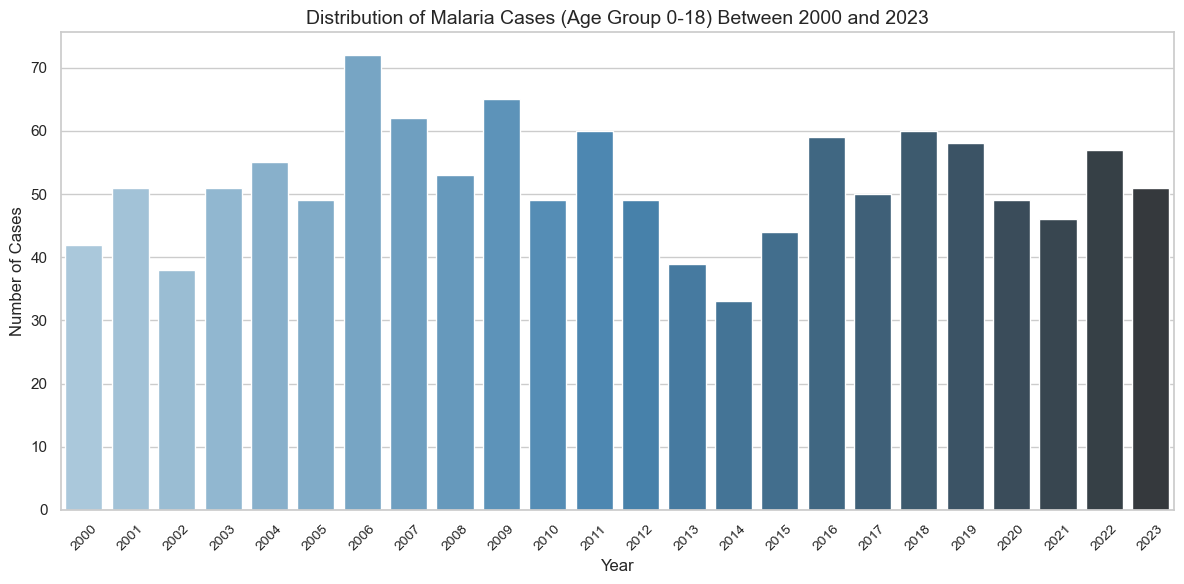

In [117]:
# Filter data for Malaria, Year between 2000 and 2023, and Age Group 0-18
malaria_data = df[
    (df['Disease Name'] == 'Malaria') & 
    (df['Year'] >= 2000) & 
    (df['Year'] <= 2023) & 
    (df['Age Group'] == '0-18')
]

yearly_distribution = malaria_data['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_distribution.index, y=yearly_distribution.values, palette='Blues_d')

plt.title('Distribution of Malaria Cases (Age Group 0-18) Between 2000 and 2023', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

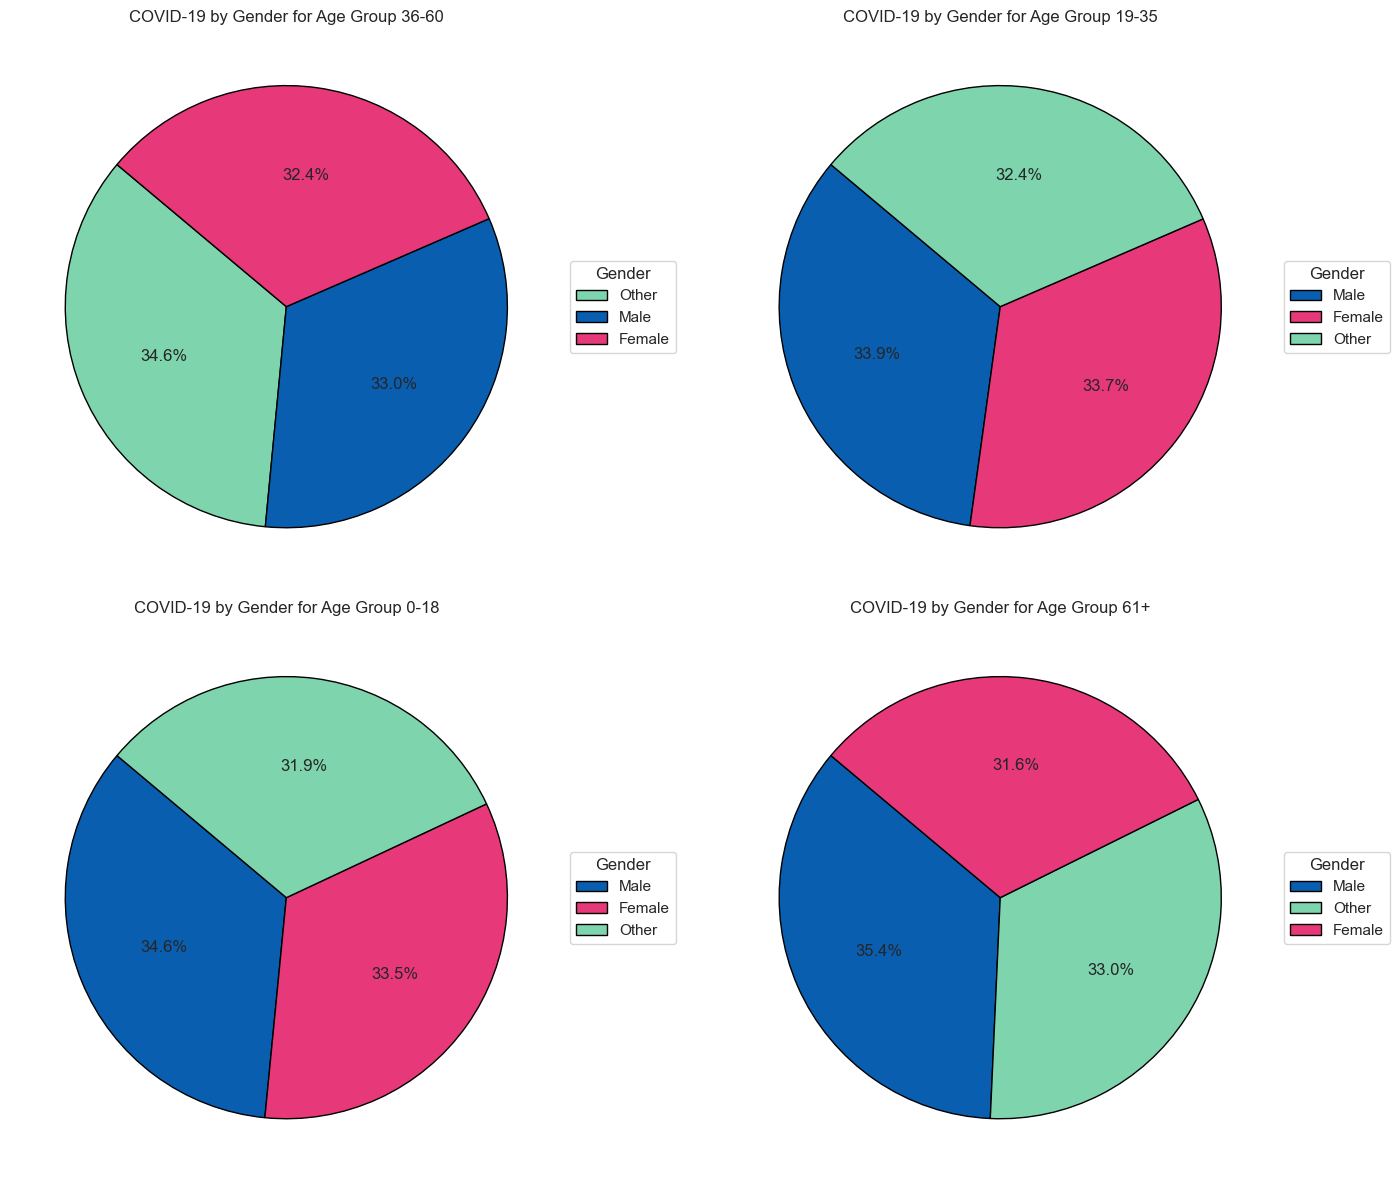

In [118]:
# Filter data for COVID-19
covid_data = df[df['Disease Name'] == 'COVID-19']

unique_age_groups = covid_data['Age Group'].unique()

num_age_groups = len(unique_age_groups)
num_cols = 2
num_rows = (num_age_groups + num_cols - 1) // num_cols  

plt.figure(figsize=(15, 6 * num_rows))

gender_colors = {'Male': '#0A5EB0', 'Female': '#E73879', 'Other': '#7ED4AD'}

for i, age_group in enumerate(unique_age_groups):
    plt.subplot(num_rows, num_cols, i + 1)
    
    age_group_data = covid_data[covid_data['Age Group'] == age_group]
    
    gender_counts = age_group_data['Gender'].value_counts()

    colors = [gender_colors[gender] for gender in gender_counts.index]
    
    wedges, texts, autotexts = plt.pie(
        gender_counts,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140, 
        wedgeprops={'edgecolor': 'black'}
    )
    
    plt.legend(wedges, gender_counts.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0.5))
    
    plt.title(f'COVID-19 by Gender for Age Group {age_group}', fontsize=12)
    plt.ylabel('')

plt.tight_layout()
plt.show()

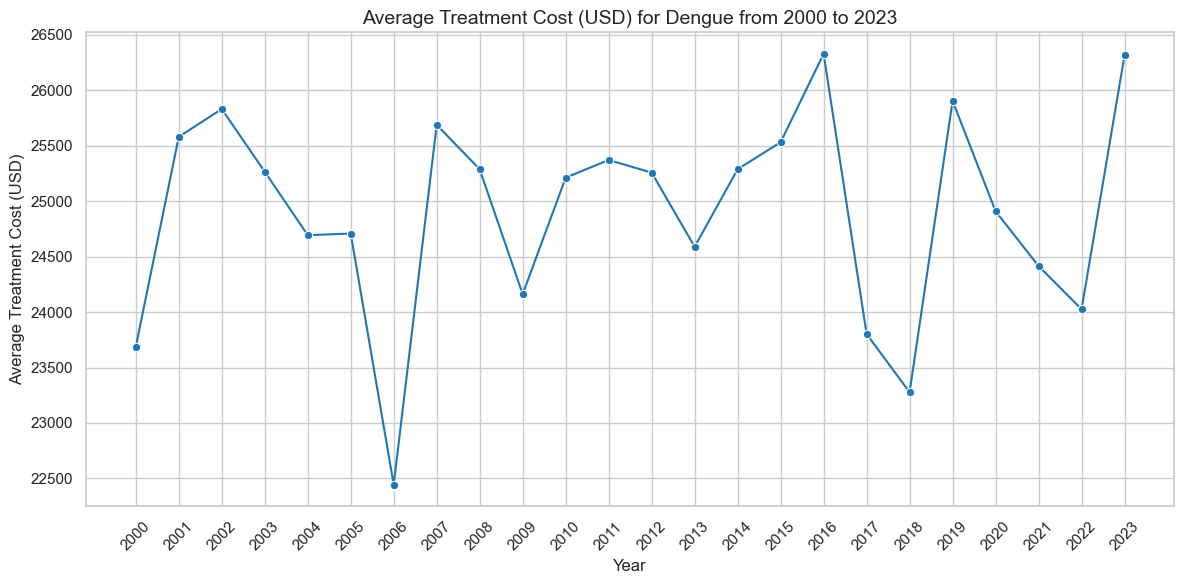

In [119]:
# Filter data for Dengue and Year between 2000 and 2023
dengue_data = df[
    (df['Disease Name'] == 'Dengue') & 
    (df['Year'] >= 2000) & 
    (df['Year'] <= 2023)
]

# Group by Year and calculate the mean of Average Treatment Cost (USD)
average_cost_per_year = dengue_data.groupby('Year')['Average Treatment Cost (USD)'].mean()

all_years = range(2000, 2024)
average_cost_per_year = average_cost_per_year.reindex(all_years, fill_value=0)

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_cost_per_year.index, y=average_cost_per_year.values, marker='o', color='tab:blue')

plt.title('Average Treatment Cost (USD) for Dengue from 2000 to 2023', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Treatment Cost (USD)', fontsize=12)

plt.xticks(range(2000, 2024), rotation=45)  
plt.tight_layout()
plt.show()


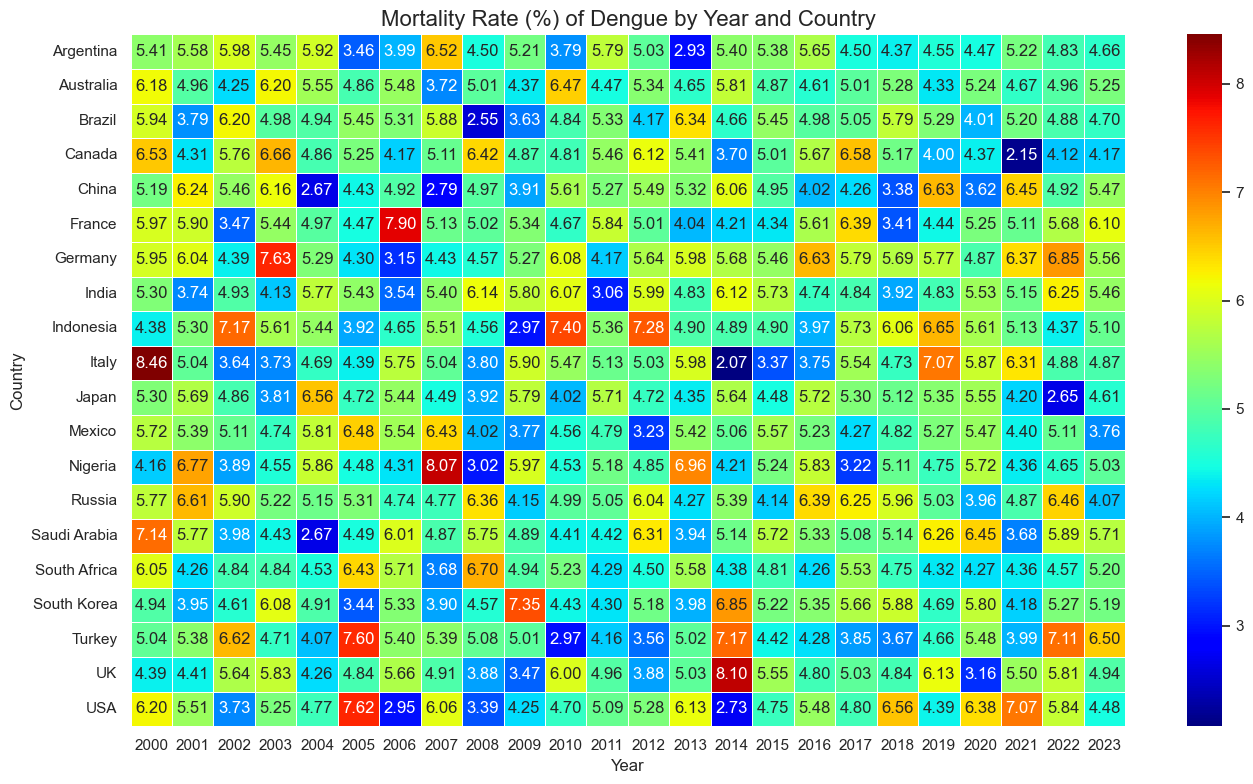

In [120]:
dengue_data = df[df['Disease Name'] == 'Dengue']

dengue_data = dengue_data[dengue_data['Year'].between(2000, 2023)]

heatmap_data = dengue_data.pivot_table(values='Mortality Rate (%)', index='Country', columns='Year')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='jet', linewidths=0.5)

plt.title('Mortality Rate (%) of Dengue by Year and Country', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.tight_layout()
plt.show()

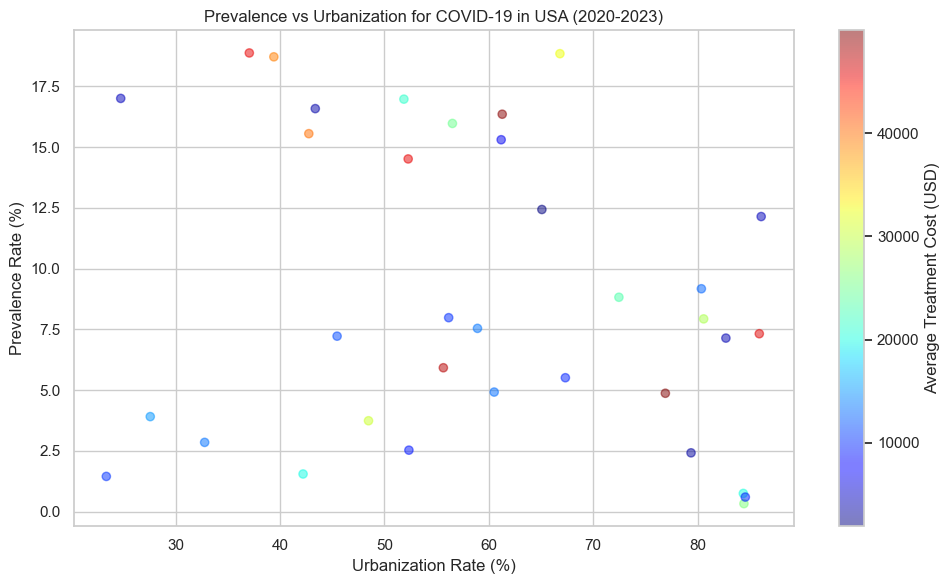

In [121]:
# Filter data for COVID-19, Country = USA, and Year between 2020 and 2023
covid_usa_data = df[(df['Disease Name'] == 'COVID-19') & (df['Country'] == 'USA') & (df['Year'].between(2020, 2023))]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(covid_usa_data['Urbanization Rate (%)'], covid_usa_data['Prevalence Rate (%)'], 
            c=covid_usa_data['Average Treatment Cost (USD)'], cmap='jet', alpha=0.5)

# Add labels and title
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Prevalence Rate (%)')
plt.title('Prevalence vs Urbanization for COVID-19 in USA (2020-2023)')

# Add color bar with label
plt.colorbar(label='Average Treatment Cost (USD)')

# Display the plot
plt.tight_layout()
plt.show()

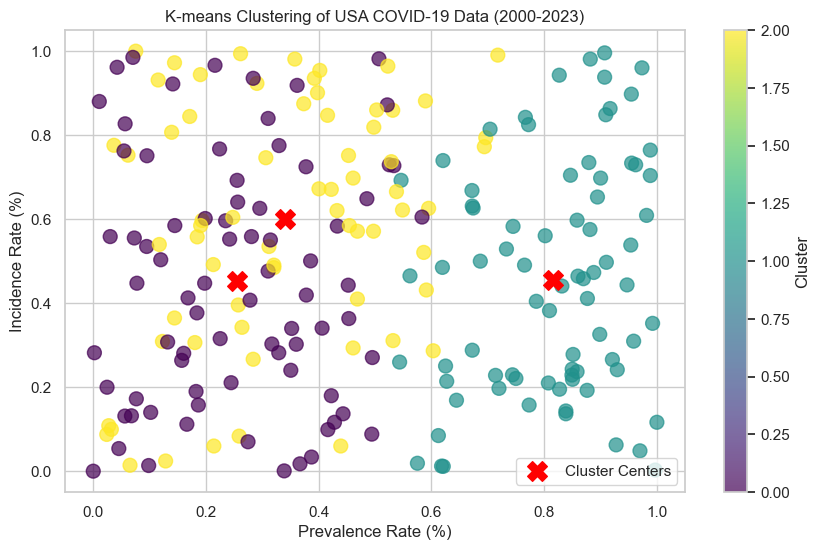

         Prevalence Rate (%)  Incidence Rate (%)  Mortality Rate (%)
Cluster                                                             
0                   5.140649            6.845058            7.660519
1                  16.121688            6.893506            5.345974
2                   6.801061            9.040909            2.480378


In [122]:
# Filter data for USA, Disease Name 'COVID-19', and Year between 2020 and 2023
filtered_data = df[(df['Country'] == 'USA') & (df['Disease Name'] == 'COVID-19') & (df['Year'] >= 2000) & (df['Year'] <= 2023)]

# Select the relevant attributes for clustering
attributes = ['Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)']
clustering_data = filtered_data[attributes].dropna()  # Drop rows with missing values

# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(normalized_data)

clustering_data['Cluster'] = clusters

plt.figure(figsize=(10, 6))

plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)

plt.xlabel('Prevalence Rate (%)')
plt.ylabel('Incidence Rate (%)')
plt.title('K-means Clustering of USA COVID-19 Data (2000-2023)')

plt.colorbar(label='Cluster')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.legend()

plt.show()

cluster_summary = clustering_data.groupby('Cluster').mean()
print(cluster_summary)

In [123]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, round

# Initialize SparkSession
spark = SparkSession.builder.appName("Healthcare Analysis").getOrCreate()

# Load data into PySpark DataFrame
df = spark.read.csv("Health_stats.csv", header=True, inferSchema=True)

covid_usa = df.filter((df["Disease Name"] == "COVID-19") & 
                      (df["Country"] == "USA") & 
                      (df["Year"].between(2000, 2023)))

avg_treatment_cost = (
    covid_usa.groupBy("Year")
    .agg(round(avg("Average Treatment Cost (USD)"), 2).alias("Avg Treatment Cost (USD)"))
)

# Show the results
avg_treatment_cost.show()

+----+------------------------+
|Year|Avg Treatment Cost (USD)|
+----+------------------------+
|2007|                31996.92|
|2015|                27057.22|
|2023|                18478.56|
|2006|                 22475.5|
|2022|                 15859.0|
|2013|                 27802.5|
|2014|                22339.25|
|2019|                20615.31|
|2004|                 27535.5|
|2020|                19795.08|
|2012|                35845.77|
|2009|                21596.43|
|2016|                25792.44|
|2001|                32953.64|
|2005|                20114.22|
|2000|                31535.07|
|2010|                 21039.6|
|2011|                16738.33|
|2008|                 19976.4|
|2017|                15932.89|
+----+------------------------+
only showing top 20 rows

